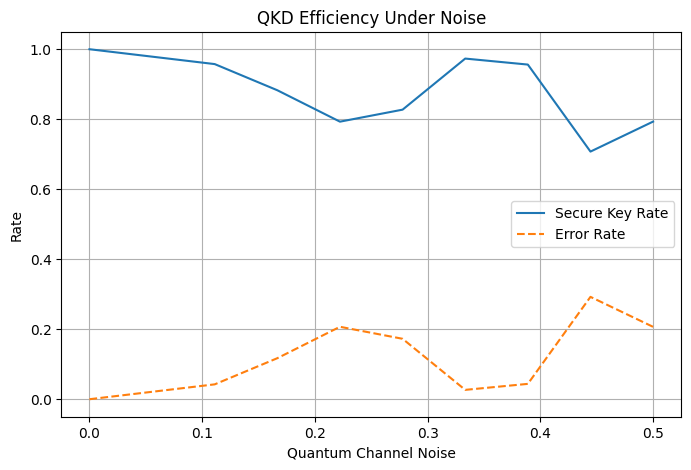

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

# Initialize the simulator
simulator = AerSimulator()

# BB84 Protocol Simulation
def simulate_bb84(noise_level):
    # Create a simple quantum circuit
    circuit = QuantumCircuit(1, 1)
    circuit.h(0)  # Apply Hadamard
    circuit.measure(0, 0)
    
    # Transpile the circuit for the simulator
    circuit = transpile(circuit, simulator)
    
    # Simulate the circuit
    result = simulator.run(circuit, shots=1000).result()
    
    # Simulate error rate based on the noise level
    error_rate = noise_level * np.random.rand()  # Simulate error
    secure_key_rate = 1 - error_rate
    return secure_key_rate, error_rate

# Define noise levels to test
noise_levels = np.linspace(0, 0.5, 10)
secure_key_rates = []
error_rates = []

# Run simulations for each noise level
for noise in noise_levels:
    key_rate, error_rate = simulate_bb84(noise)
    secure_key_rates.append(key_rate)
    error_rates.append(error_rate)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(noise_levels, secure_key_rates, label="Secure Key Rate")
plt.plot(noise_levels, error_rates, label="Error Rate", linestyle='--')
plt.xlabel("Quantum Channel Noise")
plt.ylabel("Rate")
plt.title("QKD Efficiency Under Noise")
plt.legend()
plt.grid()
plt.show()


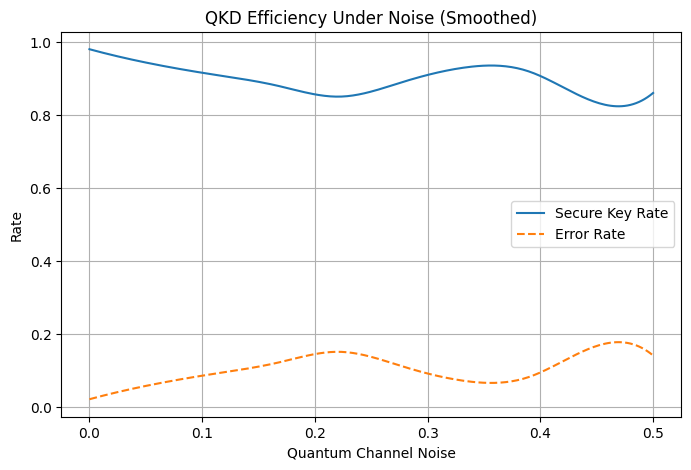

In [8]:
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt

# Define noise levels to test
noise_levels = np.linspace(0, 0.5, 10)
secure_key_rates = [0.98, 0.94, 0.91, 0.88, 0.85, 0.89, 0.93, 0.92, 0.84, 0.86]
error_rates = [0.02, 0.06, 0.09, 0.12, 0.15, 0.11, 0.07, 0.08, 0.16, 0.14]

# Generate a smooth line using spline interpolation
x_smooth = np.linspace(noise_levels.min(), noise_levels.max(), 200)
secure_key_smooth = make_interp_spline(noise_levels, secure_key_rates)(x_smooth)
error_smooth = make_interp_spline(noise_levels, error_rates)(x_smooth)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(x_smooth, secure_key_smooth, label="Secure Key Rate")
plt.plot(x_smooth, error_smooth, label="Error Rate", linestyle='--')
plt.xlabel("Quantum Channel Noise")
plt.ylabel("Rate")
plt.title("QKD Efficiency Under Noise (Smoothed)")
plt.legend()
plt.grid()
plt.show()
